In [1]:

import pandas as pd
import numpy as np
import re
import lxml
import seaborn as sns
import matplotlib as plt

%matplotlib inline

In [2]:

df = pd.read_csv('movieData.csv')
df2 = pd.read_csv('final_tmdb.csv')

In [3]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9975 entries, 0 to 9974
Data columns (total 12 columns):
popularity           9975 non-null float64
vote_count           9975 non-null int64
id                   9975 non-null int64
original_language    9975 non-null object
original_title       9975 non-null object
genre_ids            9975 non-null object
title                9975 non-null object
vote_average         9975 non-null float64
release_date         9973 non-null object
revenue              9975 non-null float64
budget               9975 non-null float64
genre_names          9975 non-null object
dtypes: float64(4), int64(2), object(6)
memory usage: 935.3+ KB


In [4]:
df2.columns = map(str.title, df2.columns)
df2.rename(columns={'Genre_Names':'Genre'},inplace = True)


In [5]:
df2['Year']=df2['Release_Date']
df2.dropna(subset = ['Year'], inplace = True)
df2['Year']=df2['Year'].apply(lambda x: x[0:4])
df2['Year']=df2['Year'].astype(int)

In [6]:
df['Genre']

0         Comedy Drama Thriller
1         Horror Mystery Sci-Fi
2            Comedy Crime Drama
3       Action Adventure Comedy
4              Comedy Drama War
                 ...           
4781       Comedy Drama Romance
4782               Comedy Drama
4783               Comedy Drama
4784       Comedy Drama Romance
4785                      Drama
Name: Genre, Length: 4786, dtype: object

In [7]:
merged = pd.merge(left = df, right = df2, on=['Title', 'Year'])

In [8]:
merged.head()
df.loc[df['Title'] == 'Fight Club']

,Title,Year,Genre,Rating,Score,Director,Stars,Gross
93,Fight Club,1999,Drama,8.8,66.0,David Fincher,"['Brad Pitt', 'Edward Norton', 'Meat Loaf', 'Z...",37030102


In [9]:
df2['Genre']

0                                   ['Comedy', 'Romance']
1       ['Adventure', 'Drama', 'Mystery', 'Science Fic...
2       ['Action', 'Comedy', 'Science Fiction', 'Family']
3            ['Action', 'Adventure', 'Comedy', 'Fantasy']
4       ['Horror', 'Mystery', 'Science Fiction', 'Thri...
                              ...                        
9970                                      ['Documentary']
9971           ['Horror', 'Thriller', 'Comedy', 'Action']
9972                                           ['Horror']
9973                                  ['Drama', 'Comedy']
9974                                 ['Comedy', 'Horror']
Name: Genre, Length: 9973, dtype: object

In [10]:
df2.loc[df2['Title']=='Fight Club']

,Popularity,Vote_Count,Id,Original_Language,Original_Title,Genre_Ids,Title,Vote_Average,Release_Date,Revenue,Budget,Genre,Year
116,36.276,18248,550,en,Fight Club,[18],Fight Club,8.4,1999-10-15,100.85,63.0,['Drama'],1999


In [11]:
merged.loc[merged['Title']=='Fight Club']

,Title,Year,Genre_x,Rating,Score,Director,Stars,Gross,Popularity,Vote_Count,Id,Original_Language,Original_Title,Genre_Ids,Vote_Average,Release_Date,Revenue,Budget,Genre_y
88,Fight Club,1999,Drama,8.8,66.0,David Fincher,"['Brad Pitt', 'Edward Norton', 'Meat Loaf', 'Z...",37030102,36.276,18248,550,en,Fight Club,[18],8.4,1999-10-15,100.85,63.0,['Drama']


In [12]:
merged.drop(['Id','Original_Language','Original_Title','Genre_Ids','Genre_y'],axis =1)

,Title,Year,Genre_x,Rating,Score,Director,Stars,Gross,Popularity,Vote_Count,Vote_Average,Release_Date,Revenue,Budget
0,Parasite,2019,Comedy Drama Thriller,8.6,96.0,Bong Joon Ho,"['Kang-ho Song', 'Sun-kyun Lee', 'Yeo-jeong Jo...",51479136,148.987,4756,8.6,2019-05-30,201.06,11.36
1,The Invisible Man,2020,Horror Mystery Sci-Fi,7.6,71.0,Leigh Whannell,"['Elisabeth Moss', 'Oliver Jackson-Cohen', 'Ha...",28205665,215.930,174,7.5,2020-02-26,0.00,9.00
2,Knives Out,2019,Comedy Crime Drama,8.0,82.0,Rian Johnson,"['Daniel Craig', 'Chris Evans', 'Ana de Armas'...",164655243,96.543,2485,7.8,2019-11-27,163.70,40.00
3,Sonic the Hedgehog,2020,Action Adventure Comedy,6.8,47.0,Jeff Fowler,"['Ben Schwartz', 'James Marsden', 'Jim Carrey'...",128555045,217.757,546,7.1,2020-02-12,265.49,85.00
4,Jojo Rabbit,2019,Comedy Drama War,8.0,58.0,Taika Waititi,"['Roman Griffin Davis', 'Thomasin McKenzie', '...",33122789,68.363,2208,8.1,2019-10-18,82.47,14.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,Just Visiting,2001,Comedy Fantasy Sci-Fi,5.8,38.0,Jean-Marie Poiré,"['Jean Reno', 'Christina Applegate', 'Christia...",4781539,11.257,396,4.6,2001-04-06,0.00,0.00
3996,The Savages,2007,Comedy Drama,7.1,85.0,Tamara Jenkins,"['Laura Linney', 'Philip Seymour Hoffman', 'Ph...",6623082,9.985,193,6.9,2007-01-19,0.00,0.00
3997,When the Bough Breaks,2016,Crime Drama Horror,5.1,28.0,Jon Cassar,"['Morris Chestnut', 'Regina Hall', 'Romany Mal...",29747603,11.096,214,5.6,2016-09-09,30.66,10.00
3998,The Guilt Trip,2012,Comedy Drama,5.7,50.0,Anne Fletcher,"['Barbra Streisand', 'Seth Rogen', 'Julene Ren...",37134215,10.317,439,5.5,2012-12-19,41.86,40.00


In [13]:
merged.rename(columns={'Genre_x':'Genre'},inplace = True)




In [14]:
merged.loc[merged['Gross']<10000000]



,Title,Year,Genre,Rating,Score,Director,Stars,Gross,Popularity,Vote_Count,Id,Original_Language,Original_Title,Genre_Ids,Vote_Average,Release_Date,Revenue,Budget,Genre_y
9,Emma.,2020,Comedy Drama,6.9,70.0,Autumn de Wilde,"['Anya Taylor-Joy', 'Johnny Flynn', 'Bill Nigh...",1461110,31.381,23,556678,en,Emma.,"[35, 18]",7.3,2020-02-13,0.00,0.0,"['Comedy', 'Drama']"
22,Portrait of a Lady on Fire,2019,Drama Romance,8.2,95.0,Céline Sciamma,"['Noémie Merlant', 'Adèle Haenel', 'Luàna Bajr...",2471585,34.005,337,531428,fr,Portrait de la jeune fille en feu,"[18, 10749]",8.3,2019-06-17,0.00,0.0,"['Drama', 'Romance']"
23,Brahms: The Boy II,2020,Drama Horror Mystery,4.3,29.0,William Brent Bell,"['Katie Holmes', 'Owain Yeoman', 'Christopher ...",9770161,31.687,37,555974,en,Brahms: The Boy II,"[27, 9648, 53]",5.5,2020-02-20,8.04,10.0,"['Horror', 'Mystery', 'Thriller']"
34,Impractical Jokers: The Movie,2020,Comedy,7.0,39.0,Chris Henchy,"['Brian Quinn', 'Joe Gatto', 'James Murray', '...",6622091,12.502,7,566927,en,Impractical Jokers: The Movie,[35],7.8,2020-02-21,0.00,0.0,['Comedy']
44,Downhill,2020,Comedy Drama,4.9,49.0,"Directors:Nat Faxon, Jim Rash","['Julia Louis-Dreyfus', 'Will Ferrell', 'Miran...",8151371,9.425,9,560391,en,Downhill,"[35, 18]",3.4,2020-02-13,7.55,0.0,"['Comedy', 'Drama']"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3982,The Invisible Woman,2013,Biography Drama History,6.1,75.0,Ralph Fiennes,"['Ralph Fiennes', 'Felicity Jones', 'Kristin S...",1234254,7.304,120,111473,en,The Invisible Woman,"[18, 36, 10749]",6.1,2013-12-25,1.23,0.0,"['Drama', 'History', 'Romance']"
3983,Pieces of April,2003,Comedy Drama,7.0,70.0,Peter Hedges,"['Katie Holmes', 'Oliver Platt', 'Patricia Cla...",2528664,8.218,118,1550,en,Pieces of April,"[35, 18]",6.4,2003-01-19,0.00,0.3,"['Comedy', 'Drama']"
3988,Peaceful Warrior,2006,Drama Romance Sport,7.3,40.0,Victor Salva,"['Scott Mechlowicz', 'Nick Nolte', 'Amy Smart'...",3960414,7.256,199,13689,en,Peaceful Warrior,[18],7.4,2006-03-30,0.00,0.0,['Drama']
3995,Just Visiting,2001,Comedy Fantasy Sci-Fi,5.8,38.0,Jean-Marie Poiré,"['Jean Reno', 'Christina Applegate', 'Christia...",4781539,11.257,396,56715,en,Just Visiting,"[35, 14, 878]",4.6,2001-04-06,0.00,0.0,"['Comedy', 'Fantasy', 'Science Fiction']"


In [15]:
merged['Stars'] = merged['Stars'].apply(lambda x:x.strip('['))
merged['Stars'] = merged['Stars'].apply(lambda x:x.strip(']'))
merged['Stars'] = merged['Stars'].apply(lambda x:x.replace("'",''))
merged['Stars'] = merged['Stars'].apply(lambda x:x.replace("  ",' '))

merged.head()

,Title,Year,Genre,Rating,Score,Director,Stars,Gross,Popularity,Vote_Count,Id,Original_Language,Original_Title,Genre_Ids,Vote_Average,Release_Date,Revenue,Budget,Genre_y
0,Parasite,2019,Comedy Drama Thriller,8.6,96.0,Bong Joon Ho,"Kang-ho Song, Sun-kyun Lee, Yeo-jeong Jo, Woo-...",51479136,148.987,4756,496243,ko,기생충,"[35, 18, 53]",8.6,2019-05-30,201.06,11.36,"['Comedy', 'Drama', 'Thriller']"
1,The Invisible Man,2020,Horror Mystery Sci-Fi,7.6,71.0,Leigh Whannell,"Elisabeth Moss, Oliver Jackson-Cohen, Harriet ...",28205665,215.930,174,570670,en,The Invisible Man,"[27, 9648, 878, 53]",7.5,2020-02-26,0.00,9.00,"['Horror', 'Mystery', 'Science Fiction', 'Thri..."
2,Knives Out,2019,Comedy Crime Drama,8.0,82.0,Rian Johnson,"Daniel Craig, Chris Evans, Ana de Armas, Jamie...",164655243,96.543,2485,546554,en,Knives Out,"[35, 80, 18, 9648, 53]",7.8,2019-11-27,163.70,40.00,"['Comedy', 'Crime', 'Drama', 'Mystery', 'Thril..."
3,Sonic the Hedgehog,2020,Action Adventure Comedy,6.8,47.0,Jeff Fowler,"Ben Schwartz, James Marsden, Jim Carrey, Tika ...",128555045,217.757,546,454626,en,Sonic the Hedgehog,"[28, 35, 878, 10751]",7.1,2020-02-12,265.49,85.00,"['Action', 'Comedy', 'Science Fiction', 'Family']"
4,Jojo Rabbit,2019,Comedy Drama War,8.0,58.0,Taika Waititi,"Roman Griffin Davis, Thomasin McKenzie, Scarle...",33122789,68.363,2208,515001,en,Jojo Rabbit,"[35, 18, 10752]",8.1,2019-10-18,82.47,14.00,"['Comedy', 'Drama', 'War']"


In [18]:
merged['Stars']

0       Kang-ho Song, Sun-kyun Lee, Yeo-jeong Jo, Woo-...
1       Elisabeth Moss, Oliver Jackson-Cohen, Harriet ...
2       Daniel Craig, Chris Evans, Ana de Armas, Jamie...
3       Ben Schwartz, James Marsden, Jim Carrey, Tika ...
4       Roman Griffin Davis, Thomasin McKenzie, Scarle...
                              ...                        
3995    Jean Reno, Christina Applegate, Christian Clav...
3996    Laura Linney, Philip Seymour Hoffman, Philip B...
3997    Morris Chestnut, Regina Hall, Romany Malco, Mi...
3998    Barbra Streisand, Seth Rogen, Julene Renee, Za...
3999    Diane Keaton, Geraldine Page, Kristin Griffith...
Name: Stars, Length: 4000, dtype: object

In [16]:
merged.to_csv('mergedData.csv', index = False)

NameError: name 'score' is not defined

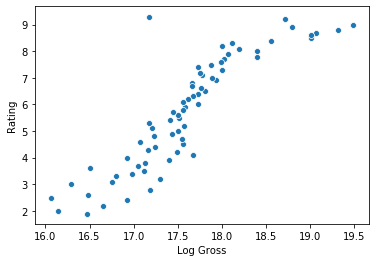

,Gross,Rating,Log Gross
Gross,1.000000,0.710769,0.891643
Rating,0.710769,1.000000,0.876996
Log Gross,0.891643,0.876996,1.000000


['Adventure', 'Drama', 'Sci-Fi']

,Gross,Genres,Genres1,Genres2,Genres3
0,2.242822e+08,"[Adventure, Drama, Sci-Fi]",Adventure,Drama,Sci-Fi
1,2.214757e+08,"[Family, Sci-Fi]",Family,Sci-Fi,Family
2,1.899691e+08,"[Musical, Romance]",Musical,Romance,Musical
3,1.841471e+08,"[Action, Adventure, Sci-Fi]",Action,Adventure,Sci-Fi
4,1.774741e+08,"[Action, Adventure]",Action,Adventure,Action
...,...,...,...,...,...
334,5.074630e+05,"[Romance, Thriller]",Romance,Thriller,Romance
335,4.580000e+05,"[Musical, Romance, War]",Musical,Romance,War
336,4.014630e+05,"[Comedy, Thriller]",Comedy,Thriller,Comedy
337,3.032300e+05,"[Family, Fantasy, Horror]",Family,Fantasy,Horror
